In [14]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [2]:
fld = '/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/TRMM_data/TRMM_byTAOpos/'

In [4]:
thisLat = -8
thisLon = -110

if thisLat < 0:
    latUnit = 'S'
else:
    latUnit = 'N'

if thisLon < 0:
    lonUnit = 'W'
else:
    lonUnit = 'E'

posFolder = f'TAOpos_{abs(thisLat):03.0f}{latUnit:s}_{abs(thisLon):03.0f}{lonUnit:s}'

In [5]:
ds = xr.open_mfdataset(fld+posFolder +'/*.nc')

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [6]:
ds

<xarray.Dataset>
Dimensions:       (time: 5950, nray: 6, fakeDim8: 2, ncell1: 80)
Coordinates:
  * time          (time) datetime64[ns] 2000-01-04T15:09:07.000578 ... 2006-1...
  * nray          (nray) int64 0 1 2 3 4 5
  * fakeDim8      (fakeDim8) int64 0 1
  * ncell1        (ncell1) int64 0 1 2 3 4 5 6 7 8 ... 72 73 74 75 76 77 78 79
Data variables:
    nearSurfRain  (time, nray) float64 dask.array<chunksize=(7, 6), meta=np.ndarray>
    e_SurfRain    (time, nray) float64 dask.array<chunksize=(7, 6), meta=np.ndarray>
    rainAve       (time, nray, fakeDim8) float64 dask.array<chunksize=(7, 6, 2), meta=np.ndarray>
    rainFlag      (time, nray) float64 dask.array<chunksize=(7, 6), meta=np.ndarray>
    rainType      (time, nray) float64 dask.array<chunksize=(7, 6), meta=np.ndarray>
    rain          (time, nray, ncell1) float64 dask.array<chunksize=(7, 6, 80), meta=np.ndarray>
    Latitude      (time, nray) float64 dask.array<chunksize=(7, 6), meta=np.ndarray>
    Longitude     (time, nray) float64 dask.array<chunksize=(7, 6), meta=np.ndarray>

In [7]:
ds_test = xr.open_dataset('/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/TRMM_data/downloaded/T_8S_110W__TRMM_2000to2007.nc')

In [8]:
ds_test

<xarray.Dataset>
Dimensions:       (Time: 19446)
Coordinates:
  * Time          (Time) datetime64[ns] 2000-01-04T15:09:07.000578048 ... 200...
Data variables:
    lon           (Time) float64 ...
    lat           (Time) float64 ...
    nearSurfRain  (Time) float64 ...

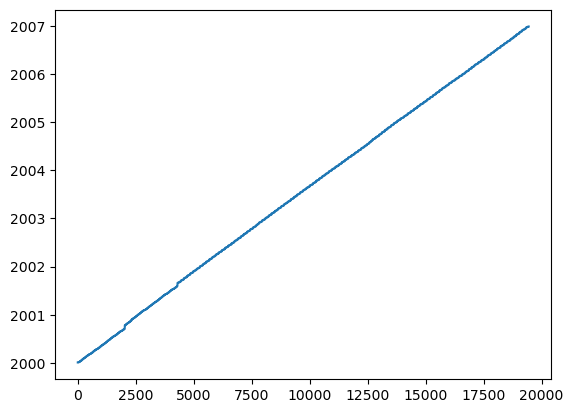

In [13]:
plt.plot(ds_test['Time'].to_numpy())

In [24]:
l = 1
for i in range(len(ds_test['Time'])-1):
    tdelta = np.array(ds_test['Time'][i+1].to_numpy() - ds_test['Time'][i].to_numpy(), dtype='timedelta64[s]')
    if tdelta > 60:
        l += 1

In [25]:
l

891

In [15]:
fileList = glob(fld+posFolder +'/*.nc')

In [16]:
st = 0
for f in fileList:
    tds = xr.open_dataset(f)
    tlen = len(tds['time'])
    st += tlen
    

In [18]:
st/len(fileList)

6.611111111111111

In [19]:
st*6

35700